In [263]:
import pandas as pd

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For our modeling steps
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer

In [265]:
df = pd.read_csv('training_set_features.csv')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [267]:
df.employment_status.value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [268]:
df1 = pd.read_csv('training_set_labels.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [269]:
df1.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [270]:
df1.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [271]:
df1.seasonal_vaccine.value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [272]:
flu_df = df.merge(df1, how='left', left_on='respondent_id', right_on='respondent_id')

In [273]:
flu_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [274]:
flu_df.groupby(['race']).size()

race
Black                 2118
Hispanic              1755
Other or Multiple     1612
White                21222
dtype: int64

In [275]:
flu_df.groupby(['race', 'age_group', 'seasonal_vaccine']).size()

race               age_group      seasonal_vaccine
Black              18 - 34 Years  0                    393
                                  1                     99
                   35 - 44 Years  0                    245
                                  1                     92
                   45 - 54 Years  0                    289
                                  1                    134
                   55 - 64 Years  0                    250
                                  1                    166
                   65+ Years      0                    200
                                  1                    250
Hispanic           18 - 34 Years  0                    512
                                  1                    155
                   35 - 44 Years  0                    262
                                  1                    117
                   45 - 54 Years  0                    203
                                  1                    111
     

In [276]:
flu_df.groupby(['race', 'sex']).size()

race               sex   
Black              Female     1356
                   Male        762
Hispanic           Female      986
                   Male        769
Other or Multiple  Female      866
                   Male        746
White              Female    12650
                   Male       8572
dtype: int64

In [277]:
flu_df[['race', 'sex', 'income_poverty']].groupby(['race', 'sex']).size()

race               sex   
Black              Female     1356
                   Male        762
Hispanic           Female      986
                   Male        769
Other or Multiple  Female      866
                   Male        746
White              Female    12650
                   Male       8572
dtype: int64

In [278]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [279]:
not_relevant = [
    'h1n1_concern',
    'h1n1_knowledge',
    'doctor_recc_h1n1',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'employment_industry',
    'employment_occupation',
    'hhs_geo_region',
    'census_msa',
    'health_insurance',
    'respondent_id',
    'h1n1_vaccine'
]

seasonal_df = flu_df.drop(not_relevant, axis=1)

In [280]:
seasonal_df.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,2.0,0.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0,0


In [281]:
seasonal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  opinion_seas_vacc_effective  26245 non-null  float64
 12  opinion_seas_risk            26193 non-null  float64
 13  opinion_seas_sic

In [282]:
X = seasonal_df.drop('seasonal_vaccine', axis=1)
y = seasonal_df['seasonal_vaccine']

In [283]:
col_missing = [col for col in seasonal_df.columns if seasonal_df[col].isnull().any()]
col_missing

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'household_adults',
 'household_children']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
15654,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,65+ Years,< 12 Years,White,Male,Below Poverty,Married,Own,Not in Labor Force,1.0,0.0
14559,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,45 - 54 Years,12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,0.0,0.0
13752,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,1.0,0.0
21985,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,...,65+ Years,< 12 Years,Other or Multiple,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,1.0,0.0
18196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,18 - 34 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,1.0,3.0
17289,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",NaN,Own,Employed,0.0,1.0
5192,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0
12172,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,0.0,0.0


In [285]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [286]:
imp = imp.fit(X_train[col_missing])

c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False 

In [287]:
X_train[col_missing] = imp.transform(X_train[col_missing])
X_test[col_missing] = imp.transform(X_test[col_missing])

<ipython-input-287-29390d122482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col_missing] = imp.transform(X_train[col_missing])
c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-287-29390d122482>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [252]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 15654 to 235
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    20030 non-null  float64
 1   behavioral_avoidance         20030 non-null  float64
 2   behavioral_face_mask         20030 non-null  float64
 3   behavioral_wash_hands        20030 non-null  float64
 4   behavioral_large_gatherings  20030 non-null  float64
 5   behavioral_outside_home      20030 non-null  float64
 6   behavioral_touch_face        20030 non-null  float64
 7   doctor_recc_seasonal         20030 non-null  float64
 8   chronic_med_condition        20030 non-null  float64
 9   child_under_6_months         20030 non-null  float64
 10  health_worker                20030 non-null  float64
 11  opinion_seas_vacc_effective  20030 non-null  float64
 12  opinion_seas_risk            20030 non-null  float64
 13  opinion_seas_s

In [288]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6677 entries, 25567 to 1756
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    6677 non-null   float64
 1   behavioral_avoidance         6677 non-null   float64
 2   behavioral_face_mask         6677 non-null   float64
 3   behavioral_wash_hands        6677 non-null   float64
 4   behavioral_large_gatherings  6677 non-null   float64
 5   behavioral_outside_home      6677 non-null   float64
 6   behavioral_touch_face        6677 non-null   float64
 7   doctor_recc_seasonal         6677 non-null   float64
 8   chronic_med_condition        6677 non-null   float64
 9   child_under_6_months         6677 non-null   float64
 10  health_worker                6677 non-null   float64
 11  opinion_seas_vacc_effective  6677 non-null   float64
 12  opinion_seas_risk            6677 non-null   float64
 13  opinion_seas_s

In [289]:
from sklearn.preprocessing import OneHotEncoder
col_encode = [
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'age_group',
    'education',
    'race',
    'sex',
    'income_poverty',
    'marital_status',
    'rent_or_own',
    'employment_status',
    'household_adults',
    'household_children'
]

col_no_encode = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'doctor_recc_seasonal',
    'chronic_med_condition',
    'child_under_6_months',
    'health_worker',

]
X_train_binary = X_train[col_no_encode]
X_test_binary = X_test[col_no_encode]

In [290]:
def custom_combiner(feature, category):
    return str(feature) + "_" + type(category).__name__ + "_" + str(category)

df_train_encode = X_train[col_encode]
df_test_encode = X_test[col_encode]
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(df_encode)


OneHotEncoder(drop='first', sparse=False)

In [291]:
ohe.get_feature_names()

array(['x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x1_2.0', 'x1_3.0',
       'x1_4.0', 'x1_5.0', 'x2_35 - 44 Years', 'x2_45 - 54 Years',
       'x2_55 - 64 Years', 'x2_65+ Years', 'x3_< 12 Years',
       'x3_College Graduate', 'x3_Some College', 'x4_Hispanic',
       'x4_Other or Multiple', 'x4_White', 'x5_Male', 'x6_> $75,000',
       'x6_Below Poverty', 'x7_Not Married', 'x8_Rent',
       'x9_Not in Labor Force', 'x9_Unemployed', 'x10_1.0', 'x10_2.0',
       'x10_3.0', 'x11_1.0', 'x11_2.0', 'x11_3.0'], dtype=object)

In [292]:
train_trans_data = ohe.transform(df_train_encode)
test_trans_data = ohe.transform(df_test_encode)
X_train_encode = pd.DataFrame(train_trans_data, index=X_train.index)
X_test_encode = pd.DataFrame(test_trans_data, index=X_test.index)
X_train_encode.columns = ohe.get_feature_names()
X_test_encode.columns = ohe.get_feature_names()


In [293]:
X_train_encoded_binary = pd.concat([X_train_binary, X_train_encode], axis=1)
X_test_encoded_binary = pd.concat([X_test_binary, X_test_encode], axis=1)

In [294]:
X_train_encoded_binary

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,x7_Not Married,x8_Rent,x9_Not in Labor Force,x9_Unemployed,x10_1.0,x10_2.0,x10_3.0,x11_1.0,x11_2.0,x11_3.0
15654,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14559,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13752,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21985,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17289,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5192,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12172,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [261]:
X_train_encoded_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 15654 to 235
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    20030 non-null  float64
 1   behavioral_avoidance         20030 non-null  float64
 2   behavioral_face_mask         20030 non-null  float64
 3   behavioral_wash_hands        20030 non-null  float64
 4   behavioral_large_gatherings  20030 non-null  float64
 5   behavioral_outside_home      20030 non-null  float64
 6   behavioral_touch_face        20030 non-null  float64
 7   doctor_recc_seasonal         20030 non-null  float64
 8   chronic_med_condition        20030 non-null  float64
 9   child_under_6_months         20030 non-null  float64
 10  health_worker                20030 non-null  float64
 11  x0_2.0                       20030 non-null  float64
 12  x0_3.0                       20030 non-null  float64
 13  x0_4.0        

In [295]:
cred_model = LogisticRegression(random_state=1)
cred_model.fit(X_train_encoded_binary, y_train)

LogisticRegression(random_state=1)

In [296]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

In [297]:
cred_model.score(X_test_encoded_binary, y_test)

0.7852328890220158

In [298]:
y_pred = cred_model.predict(X_test_encoded_binary)
cm_1 = confusion_matrix(y_test, y_pred)
cm_1

array([[2983,  656],
       [ 778, 2260]], dtype=int64)

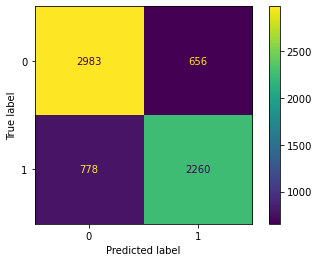

In [300]:
plot_confusion_matrix(cred_model, X_test_encoded_binary, y_test)

In [301]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      3639
           1       0.78      0.74      0.76      3038

    accuracy                           0.79      6677
   macro avg       0.78      0.78      0.78      6677
weighted avg       0.78      0.79      0.78      6677

